Interface link: https://image-search-engine.streamlit.app/

In [107]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.feature import hog
from numpy.fft import fft2, ifft2, fftshift

# Color-based: RGB histograms

In [108]:
input_image = cv2.imread("database/01.jpg")
input_image = cv2.resize(input_image, (200, 200))
database_images = []
for filename in os.listdir("database"):
    img = cv2.imread(os.path.join("database", filename))
    database_images.append((filename, img))

In [109]:
def calculate_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

input_hist = calculate_histogram(input_image)
database_histograms = [(name, calculate_histogram(image)) for name, image in database_images]

In [110]:
input_hist.shape

(512,)

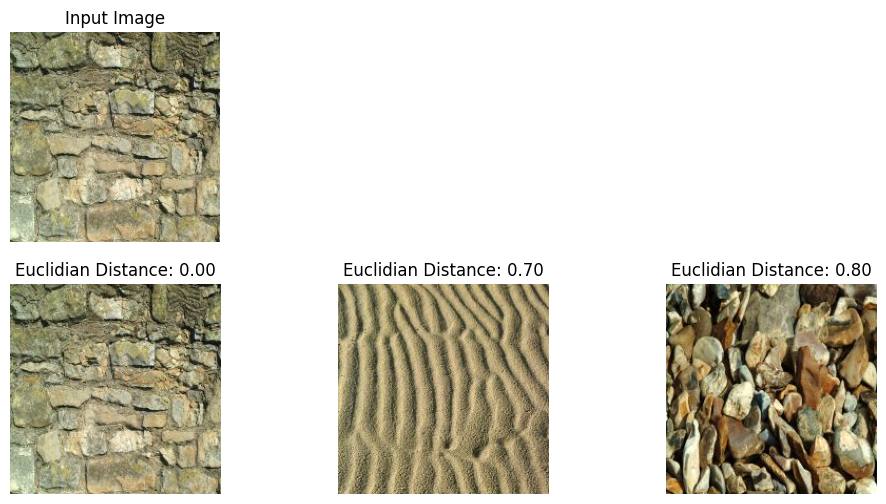

In [111]:
def euclidean_distance(hist1, hist2):
    return np.linalg.norm(hist1 - hist2)

distances = [(name, euclidean_distance(input_hist, hist)) for name, hist in database_histograms]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Euclidian Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

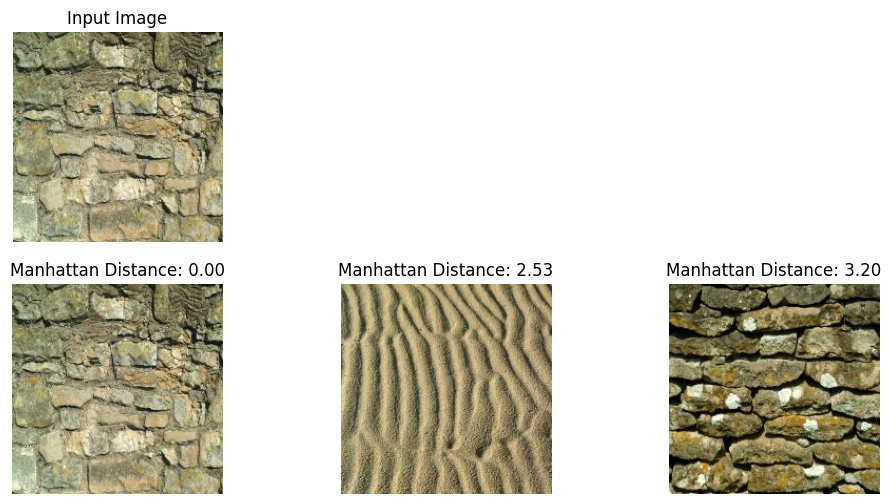

In [112]:
def manhattan_distance(hist1, hist2):
  return np.sum(np.abs(hist1 - hist2))

distances = [(name, manhattan_distance(input_hist, hist)) for name, hist in database_histograms]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Manhattan Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

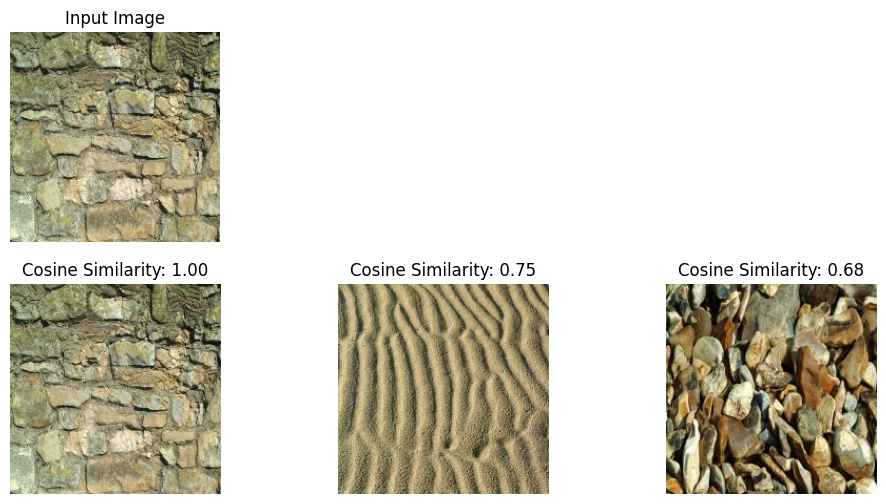

In [113]:
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    return similarity

similarities = [(name, cosine_similarity(input_hist, hist)) for name, hist in database_histograms]
similarities.sort(key=lambda x: x[1], reverse=True)
top_similar_images = similarities[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Cosine Similarity: {dist:.2f}")
    plt.axis('off')

plt.show()

# Shape-based: HOG Descriptor

In [114]:
def calculate_hog(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog1 = hog(gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
    return hog1

In [115]:
input_hog = calculate_hog(input_image)
database_hogs = [(name, calculate_hog(image)) for name, image in database_images]

In [116]:
input_hog.shape

(20736,)

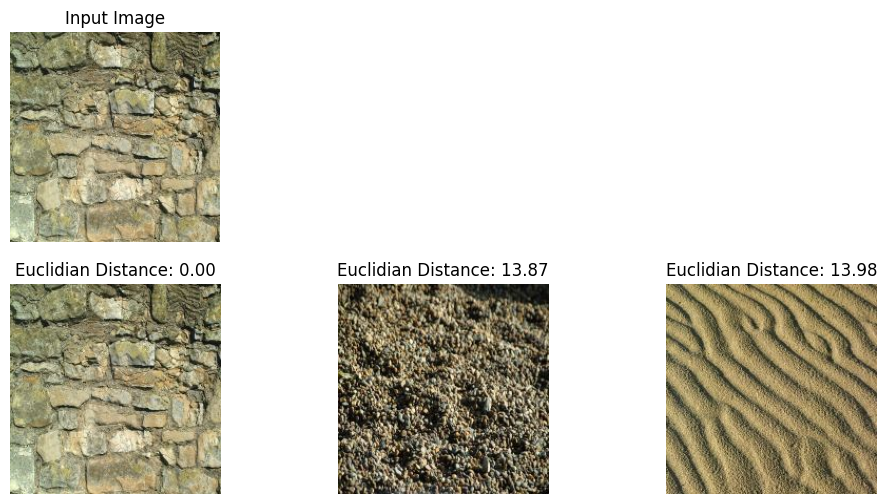

In [117]:
distances = [(name, euclidean_distance(input_hog, hog)) for name, hog in database_hogs]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Euclidian Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

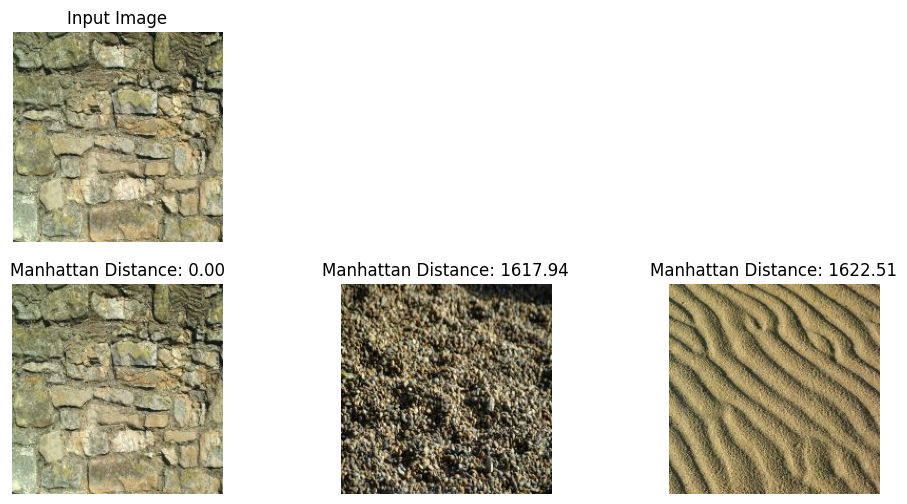

In [118]:
distances = [(name, manhattan_distance(input_hog, hog)) for name, hog in database_hogs]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Manhattan Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

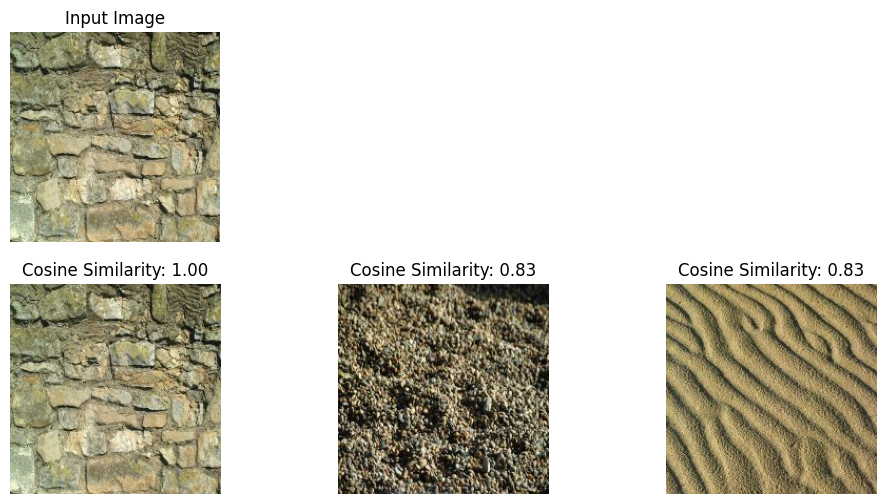

In [119]:
similarities = [(name, cosine_similarity(input_hog, hog)) for name, hog in database_hogs]
similarities.sort(key=lambda x: x[1], reverse=True)
top_similar_images = similarities[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Cosine Similarity: {dist:.2f}")
    plt.axis('off')

plt.show()

# Texture-based: Gabor Descriptor

In [120]:
def get_gabor_kernel(w, h,sigma_x, sigma_y, theta, fi, psi):
    "getting gabor kernel with those values"
    # Bounding box
    kernel_size_x = w
    kernel_size_y = h
    (y, x) = np.meshgrid(np.arange(0, kernel_size_y ), np.arange(0,kernel_size_x))
    # Rotation 
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    #Calculate the gabor kernel according the formulae
    gb = np.exp(-1.0*(x_theta ** 2.0 / sigma_x ** 2.0 + y_theta ** 2.0 / sigma_y ** 2.0)) * np.cos(2 * np.pi * fi * x_theta + psi)
    return gb

def build_filters(w, h,num_theta, fi, sigma_x, sigma_y, psi):
    "Get set of filters for GABOR"
    filters = []
    for i in range(num_theta):
        theta = ((i+1)*1.0 / num_theta) * np.pi
        for f_var in fi:
            kernel = get_gabor_kernel(w, h,sigma_x, sigma_y, theta, f_var, psi)
            kernel = 2.0*kernel/kernel.sum()
            kernel = cv2.normalize(kernel, kernel, 1.0, 0, cv2.NORM_L2)
            filters.append(kernel)
    return filters

def extractFeatures(img):
    "A vector of 2n elements where n is the number of theta angles"
    "and 2 is the number of frequencies under consideration"
    filters =  build_filters(img.shape[0],img.shape[1],5,(0.75,1.5),2,1,np.pi/2.0)
    fft_filters = [np.fft.fft2(i) for i in filters]
    img_fft = np.fft.fft2(img)
    a =  img_fft * fft_filters
    s = [np.fft.ifft2(i) for i in a]
    k = [p.real for p in s]
    return k


def calculate_gabor(image):

    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Set parameters for Gabor filters
    w, h = img.shape[1], img.shape[0]
    num_theta = 5  # Number of orientations
    fi_values = (0.75, 1.5)  # Frequencies
    sigma_x, sigma_y = 2, 1  # Standard deviations for x and y
    psi = np.pi / 2.0  # Phase offset

    # Extract Gabor filters
    filters = build_filters(w, h, num_theta, fi_values, sigma_x, sigma_y, psi)

    # Extract features from the image using Gabor filters
    features = extractFeatures(img)
    return np.array(features).flatten()

In [121]:
input_gabor = calculate_gabor(input_image)
database_gabors = [(name, calculate_gabor(image)) for name, image in database_images]

In [122]:
input_gabor.shape

(400000,)

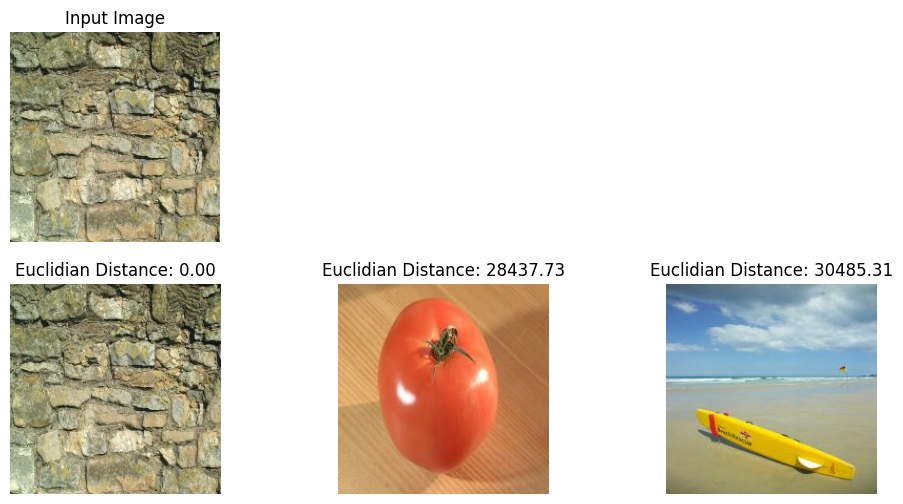

In [123]:
distances = [(name, euclidean_distance(input_gabor, gabor)) for name, gabor in database_gabors]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Euclidian Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

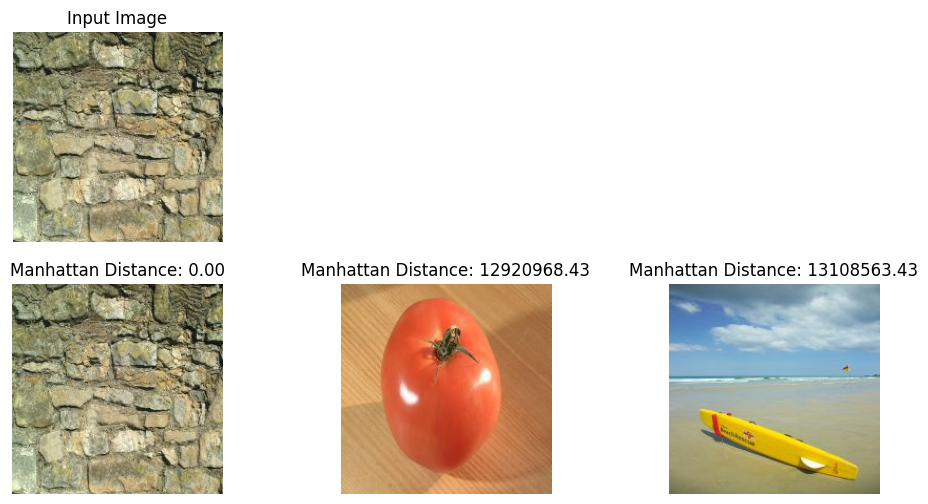

In [124]:
distances = [(name, manhattan_distance(input_gabor, gabor)) for name, gabor in database_gabors]

distances.sort(key=lambda x: x[1])
top_similar_images = distances[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Manhattan Distance: {dist:.2f}")
    plt.axis('off')

plt.show()

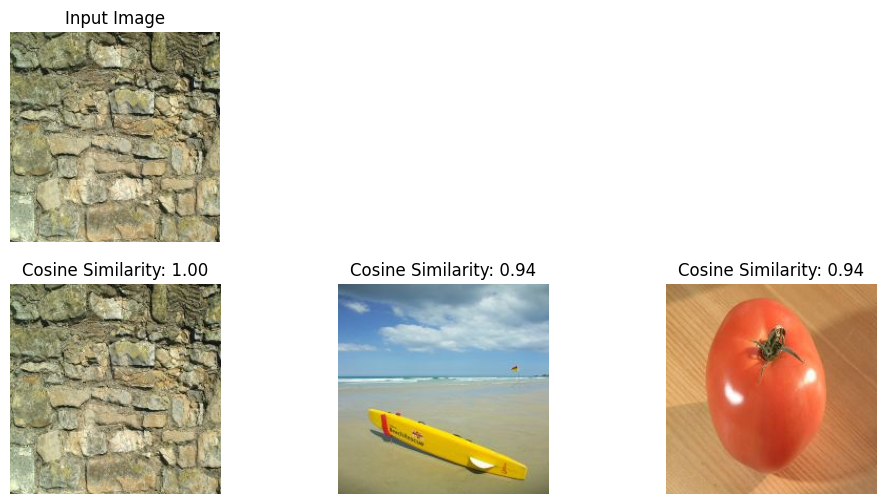

In [125]:
similarities = [(name, cosine_similarity(input_gabor, gabor)) for name, gabor in database_gabors]
similarities.sort(key=lambda x: x[1], reverse=True)
top_similar_images = similarities[:3]

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')

for i, (name, dist) in enumerate(top_similar_images):
    plt.subplot(2, 3, i + 4)

    similar_image = cv2.imread(os.path.join("database", name))
    similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB)

    plt.imshow(similar_image)
    plt.title(f"Cosine Similarity: {dist:.2f}")
    plt.axis('off')

plt.show()